# Facial Expression Recognition
The goal is to utilize pre train model to do fine tuning task for facial expression recognition.

### DATA COLLECTION
RAF-DB Dataset. Contains 30K images
emotion_labels = {
    1: "Surprise",
    2: "Fear",
    3: "Disgust",
    4: "Happiness",
    5: "Sadness",
    6: "Anger",
    7: "Neutral"
}

Student = {
    Insitution: "San Jose State University",
    Department: "Computer Engineering",
    Major: "MS. Computer Software Engineering",
    Semester: "Fall 2023",
    Course: "Deep Learning 258",
    Name: "Bunpheng Chhay"
}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change working directory to your Google Drive folder
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Huggingface/fineTuneVit/GViT21k')

# Requirement

In [3]:
!pip install --upgrade tensorflow #tensorflow == 2.15.0 minimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [4]:
# check GPU
!nvidia-smi


Fri Dec 15 04:39:36 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Model

During the training I was unable to use internet to dwonload the Google/vit-base-patch16-224-in21k using my on campus HPC to compute. Therefore I downloaded the model weight for offline fine tuning task.

In [ ]:
# !pip install torchsummary


In [ ]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the pre-trained ViT model
model_path = 'google/pretrainmodel'
feature_extractor = ViTFeatureExtractor.from_pretrained("google/feature_extractor")
num_classes = 7
model = ViTForImageClassification.from_pretrained(
    model_path,
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)  # Move the model to the chosen device

# Print the model architecture in a more organized way
print(model)

# Print the total number of parameters
print(f"Total number of parameters: {sum(p.numel() for p in model.parameters()):,}")





/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/pretrainmodel and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

# Training

## Data Preparation
Before training please ensure you have the pretrained model for offline training, or you can modified the utils.py to use the model
- Please download this model and put in google folder/ https://drive.google.com/drive/folders/1s_c1jSlSuqnnxVmtPME6djZwixHucR5I?usp=share_link
- please download this dataset and put it in RAFDB-Kaggle/ https://drive.google.com/drive/folders/1UuUKY6QDpDvbV5dlijjUkYG6xZw4OqMm?usp=share_link


In [ ]:
# !python train.py

# Testing

Before test the model please download this weight and put it in checkpointvitEnhancev1/ https://drive.google.com/drive/folders/1jHF3zibpKvw-pSN7hjgZFFpFstLdMG44?usp=share_link

I am unable to provide any sampel image. Please check with Kaggle or RAFDB:
1. https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
2. http://www.whdeng.cn/raf/model1.html

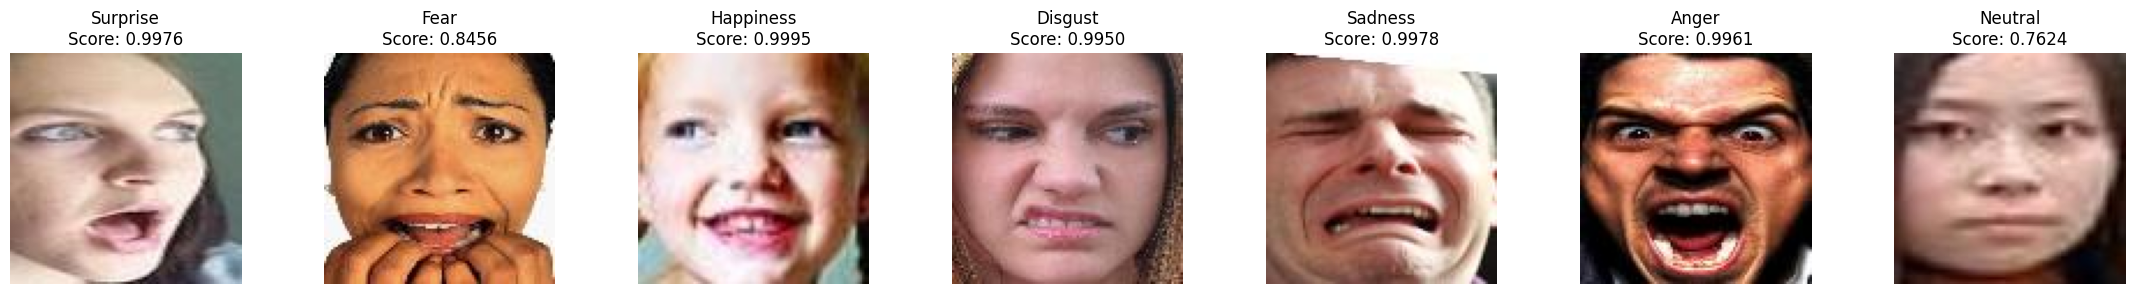

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import predict
import matplotlib.pyplot as plt

# Paths to your images
image_paths = [
    'test_sample/test_0004_aligned.jpg',
    'test_sample/test_2241_aligned.jpg',
    'test_sample/test_0161_aligned.jpg',
    'test_sample/test_0940_aligned.jpg',
    'test_sample/test_1450_aligned.jpg',
    'test_sample/test_1445_aligned.jpg',
    'test_sample/test_2391_aligned.jpg'
]

# Set the number of columns for the display
num_columns = len(image_paths)

# Set the size of each image
image_width = 4  # Adjust as needed
image_height = 3  # Adjust as needed

# Create a subplot with the specified number of columns
fig, axs = plt.subplots(1, num_columns, figsize=(image_width * num_columns, image_height))

# Load and display each image with prediction result and score
for i, path in enumerate(image_paths):
    image = Image.open(path)
    predicted_emotion, prediction_score = predict.predict_emotion(path)
    title = f"{predicted_emotion}\nScore: {prediction_score:.4f}"  # Combine emotion and score in the title
    axs[i].imshow(image)
    axs[i].set_title(title)  # Set the title as the combined emotion and score
    axs[i].axis('off')  # Hide axis labels

# Adjust spacing between images
plt.subplots_adjust(wspace=0.1)

# Display the images with predictions and scores horizontally
plt.show()


In [ ]:
# !python test_Model.py

2023-12-15 02:33:15.789076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 02:33:15.789121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 02:33:15.790359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 02:33:16.917314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Testing Progress: 100% 96/96 [29:09<00:00, 18.22s/it]
              precision    recall  f1-score   support

    Surprise       0.87      0.86      0.86       329
        Fear       0.66      0.54      0.59        74
     Disgust       0.57 

# Inference

In [5]:
!pip install opencv-python-headless
!apt-get install -y libsm6 libxext6 libxrender-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender-dev is already the newest version (1:0.9.10-1build4).
libxrender-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [6]:
!pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.54-py3-none-any.whl size=37576 sha256=38928ec829ccd2473c19166ada218f9410cd7a7f4b97d57513d595

In [8]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# from predict import predict_emotion
# from realtimeInference import video_frame, video_stream, js_to_image, bbox_to_bytes

In [9]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [16]:

from predict import predict_emotion
from inferencelive import video_frame, video_stream, js_to_image, bbox_to_bytes
# inferencelive.py is based on this https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw#scrollTo=ghUlAJzKSjFT

In [17]:
import cv2
import numpy as np
from PIL import Image
import tempfile
import os
import math
import imutils

# Initialize variables for face tracking
face_tracker = None
face_rect = None

# ... (Your other code including model loading)

# Processing loop
video_stream()
label_html = 'Capturing...'
bbox = ''
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    if face_tracker is None:
        # Initialize face tracker if not already
        face_tracker = cv2.TrackerKCF_create()
        faces = face_cascade.detectMultiScale(gray)
        if len(faces) > 0:
            (x, y, w, h) = faces[0]
            face_rect = (x, y, w, h)
            face_tracker.init(img, face_rect)

    else:
        # Update face tracker
        (success, face_rect) = face_tracker.update(img)

        if success:
            (x, y, w, h) = [int(v) for v in face_rect]
            face = img[y:y + h, x:x + w]
            face_image = Image.fromarray(face)

            # Save the face image to a temporary file
            temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
            face_image.save(temp_file.name)

            # Predict emotion
            predicted_emotion, predicted_score = predict_emotion(temp_file.name)
            predicted_score = math.ceil(predicted_score * 1000) / 1000  # Round up to 3 decimal places
            # Draw bounding box and label
            bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)
            text = f"{predicted_emotion}: {predicted_score}"
            cv2.putText(bbox_array, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Delete the temporary file
            temp_file.close()
            os.unlink(temp_file.name)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so the next frame gets a new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

In [13]:
# from predict import predict_emotion
# from inferencelive import video_frame, video_stream, js_to_image, bbox_to_bytes

In [15]:
# import cv2
# import numpy as np
# from PIL import Image
# import tempfile
# import os
# import math

# # Processing loop
# video_stream()
# label_html = 'Capturing...'
# bbox = ''
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     for (x, y, w, h) in faces:
#         # Extract the face from the frame
#         face = img[y:y+h, x:x+w]
#         face_image = Image.fromarray(face)

#         # Save the face image to a temporary file
#         temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
#         face_image.save(temp_file.name)

#         # Predict emotion
#         predicted_emotion, predicted_score = predict_emotion(temp_file.name)
#         predicted_score = math.ceil(predicted_score * 1000) / 1000  # Round up to 3 decimal places
#         # Draw bounding box and label
#         bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)
#         text = f"{predicted_emotion}: {predicted_score}"
#         cv2.putText(bbox_array, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

#         # Delete the temporary file
#         temp_file.close()
#         os.unlink(temp_file.name)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes


In [ ]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode

# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename

In [ ]:
# from IPython.display import Image
# try:
#   filename = take_photo()
#   print('Saved to {}'.format(filename))

#   # Show the image which was just taken.
#   display(Image(filename))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))

In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# import tempfile
# import os
# import math

# # ... (Your other code including model loading)

# # Processing loop
# video_stream()
# label_html = 'Capturing...'
# bbox = ''
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     for (x, y, w, h) in faces:
#         # Extract the face from the frame
#         face = img[y:y+h, x:x+w]
#         face_image = Image.fromarray(face)

#         # Save the face image to a temporary file
#         temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
#         face_image.save(temp_file.name)

#         # # Predict emotion
#         # emotion = predict_emotion(temp_file.name)
#         # Predict emotion and round the prediction score to three decimal places
#         predicted_emotion, predicted_score = predict_emotion(temp_file.name)
#         predicted_score = math.ceil(predicted_score * 1000) / 1000  # Round up to 3 decimal places
#         # # Draw bounding box and label
#         # bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)
#         # # cv2.putText(bbox_array, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
#         # cv2.putText(bbox_array, str(emotion), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
#          # Draw bounding box and label
#         bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)
#         text = f"{predicted_emotion}: {prediction_score}"
#         cv2.putText(bbox_array, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

#         # Delete the temporary file
#         temp_file.close()
#         os.unlink(temp_file.name)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes


In [ ]:
# # start streaming video from webcam
# video_stream()
# # label for video
# label_html = 'Capturing...'
# # initialze bounding box to empty
# bbox = ''
# count = 0
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)
#     # get face bounding box for overlay
#     for (x,y,w,h) in faces:
#       bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>